(512, 512)


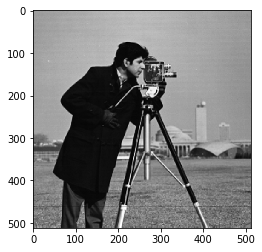

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from skimage import data

image = data.camera()
plt.imshow(image, cmap='gray')
print(image.shape) 

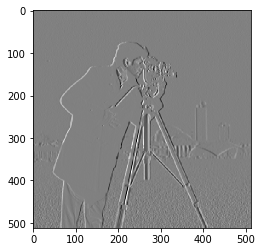

In [4]:
tf.reset_default_graph()

#Kernel weights as a 2D array
kernel_v = np.array([3, 3])
kernel_v = [[1,0,-1], [2,0,-2], [1,0,-1]]

input_placeholder = tf.placeholder(dtype=tf.float32, shape=(1, image.shape[0], image.shape[1], 1))
with tf.name_scope('convolution'):
    conv_v = tf.constant(kernel_v, dtype=tf.float32, shape=(3, 3, 1, 1))    
    filtered_v = tf.nn.conv2d(input=input_placeholder, filter=conv_v, strides=[1, 1, 1, 1], padding='SAME')
    
with tf.Session() as sess:
    result_v = sess.run(filtered_v, feed_dict={
            input_placeholder: image[np.newaxis, :, :, np.newaxis]})

#Visualising vertical edges
plt.imshow(result_v[0, :, :, 0], cmap='gray') 